In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import datetime 
import sklearn

%matplotlib inline

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit
 
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# show several prints in one cell. This will allow us to condence every trick in one cell.
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('preply_final_final.csv',sep=',')
df.drop('Unnamed: 0', inplace=True,axis=1)
df

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,3,1,1,0,0,9,7,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4013,47,2,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4014,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4015,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0


## We decided to classify the popular column into 1 and 0, and so we can run on it Logistic Regression (the values of the popuar column were 0,1,2,3).

In [3]:
for i in range(0,4017):
    if df.popular[i]>0:
        df.iloc[i,3]=1
    else :
        df.iloc[i,3]=0
    

In [4]:
df.popular.unique()

array([0, 1], dtype=int64)

# Research question: 
# Is it possible to predict whether a teacher will be popular or not.

# Our "popular" column is divided into two values 1 and 0 so we will need a classification algrorithm

# we will use Logistic Regression in order to predict the popular's column.
## Reason:
## after the change we did on the popular column - we hava binary values 0 and 1 and the Logistic Regression model is known as a model that works well on those values.

# Logistic Regression 
### is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.


In [5]:
# split dataset into feature set and target column
y = df['popular']
X = df.drop('popular', 1)

y
X

,price,lessons,rating,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,Spanish,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,10,19,7,0,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,1,25,28,7,0,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,0,1,0,19,32,7,0,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,0,0,5,7,0,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,1,1,0,0,9,7,0,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,1,0,1.0,0
4013,47,2,0.0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,1,0,1.0,0
4014,28,0,0.0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,1,0,1.0,0
4015,28,0,0.0,1,0,0,0,0,7,0,...,0,0,0,0,0,0,1,0,1.0,0


In [6]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# we also add the decision tree algrothim to get another indication about the model. to be sure about the results we will get .

# Decision Tree 
## It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar.
## A series of decisions that brings us to a decision.
### Root Junction: The first question in a decision tree.
### Intermediate Nodes: Continued Questions.
### Leaves: The decision made (prediction).
## The goal is to create more homogeneous groups after each question to create an absolute majority for a given figure.

# why we chose to use Decision Tree?
## is  perfect for classification problems from the essence of a decision tree algorithm.
## another point of view on the column's prediction.

## below you can see a function that we created that runs the two models Logistic Regression and Decision Tree on our data. 


In [7]:
ml_models={
    'LogReg'            : LogisticRegression(),
    'DecisionTree'      : DecisionTreeClassifier(),}
df_metrics=pd.DataFrame([])

for model_name in ml_models:
    
    metrics={}

    
    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    
    metrics['accuracy']= accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred) 
    metrics['recall'] = recall_score(y_test, y_pred) 
    metrics['f1'] = f1_score(y_test, y_pred) 
    df_metrics=pd.concat([df_metrics,pd.DataFrame(metrics,index=[model_name]).T],axis=1)
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)


C:\Users\liors\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1
LogReg,0.892,0.520,0.148,0.230
DecisionTree,0.823,0.255,0.318,0.283


## we can see the recall parameter is very low so we will try to improve our data so that the model will get more accurate picture of the data and as a result will give us a better prediction.

## below we tried to learn more about our target column.

In [8]:
df.popular.value_counts()
ratio= df.popular.value_counts()[1]/df.popular.value_counts()[0]
ratio

0.13314527503526094

## We can see that the ratio between the teachers that called popular to those who are non popular, is very small. Namely, the number of teachers that are non popular is very high relatively to those who called popular.

## furthermore beacuse of the low ratio we understood that the accuracy parameter is unrelevant for us beacuse it calculates a general average which get us a bad result (bad ratio). 

## We want our model to be efficient and read our data well so it can give us the best prediction.  
## So now we will handle it.

## We want that the ratio between the populars to non populars will be 1:3.
## Accordingly we will take a SAMPLE of our data with the ratio we mention before (1:3). And then we will run the algorithm again with hope to get a good prediction

# Getting a sample of our data 
## this sample contains a ratio of 1:2 (popular : non populars)

In [9]:
miniDF=df.copy() #we copy our data frame to variable "miniDF"
count= df.popular.value_counts()[1]*2  #gave the variable "count" the sum of populars teachers double by three
count0=0
print(count)
for i in range(0,4017):
    if (miniDF.popular[i] ==0 and count0<count):
        count0=count0+1
    
    elif (miniDF.popular[i] ==0 and count0==count):
        miniDF.drop([i],axis=0,inplace=True)
        

miniDF



944


,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,1,1,1,0,0,9,7,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,22,0,0.0,1,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
3663,31,59,0.0,1,1,0,0,0,4,7,...,0,0,0,0,0,0,1,1,8.0,0
3684,47,0,0.0,1,1,0,0,0,1,7,...,0,0,0,0,0,0,1,1,1.0,0
3903,6,7,0.0,1,1,0,0,0,2,6,...,0,0,0,0,0,0,1,1,3.0,0


In [10]:
print(miniDF.popular.value_counts()[1])
print(miniDF.popular.value_counts()[0])


472
944


## After reducing the number of non popular teacher on our data, and creating a new ratio between the populars and non popular- Now we have a improved version of data frame. We will use this sample, and reactivate the algorithm on it. 

In [11]:
#creating new train and test on our sample.
yMIN = miniDF['popular']
XMIN = miniDF.drop('popular', 1)

In [12]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(XMIN, yMIN, test_size=0.2, random_state=10)

## This time, we will run the function with one more model, called SVC.

# SVC (support-vector classification) :
## supervised learning model that analyze data for classification and regression analysis.
## it's prediction methods, being based on statistical learning.
## given a set of training examples, each marked as belonging to one of two categories. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
## used in many applications such as image recognition, medical diagnosis, and text analytics.


# SVC on our words:
## The model creates a virtual plane that separates the groups.


In [13]:
ml_models={
    'LogReg'            : LogisticRegression(),
    'DecisionTree'      : DecisionTreeClassifier(),
     'SVC'              : SVC(kernel='sigmoid'),}
df_metrics=pd.DataFrame([])

for model_name in ml_models:
    
    metrics={}

    
    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    
    metrics['accuracy']= accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred)
    metrics['recall'] = recall_score(y_test, y_pred)
    metrics['f1'] = f1_score(y_test, y_pred)
    df_metrics=pd.concat([df_metrics,pd.DataFrame(metrics,index=[model_name]).T],axis=1)
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)


C:\Users\liors\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1
LogReg,0.722,0.629,0.250,0.358
DecisionTree,0.641,0.426,0.455,0.440
SVC,0.535,0.292,0.352,0.320


## we can see that the results are better than before but not enough.

# Feature Engineering

## we want to improve the performance of the algorithm so we will do feature engineering on our data.

## First we will classify the values on the "lessons" column, so we can get a clear line between close values as a result the algorithm may read better the data. 

### The classification of the values:
#### 0-200------> 1
#### 201-400------> 2
#### 401-600------> 3
#### 601-800------> 4
#### 801-1000------> 5
#### 1001-1200------> 6
#### 1201-1400------> 7
#### 1401-1600------> 8
#### 1600+ -------> 9

## 1.Improving the lesson column:

In [14]:
for i in range(0,4017):
    if(df.lessons[i] >=0 and df.lessons[i] <=200):
        df.lessons[i]=1
        
    if(df.lessons[i] >=201 and df.lessons[i] <=400):
        df.lessons[i]=2
        
    if(df.lessons[i] >=401 and df.lessons[i] <=600):
        df.lessons[i]=3
        
    if(df.lessons[i] >=601 and df.lessons[i] <=800):
        df.lessons[i]=4
        
    if(df.lessons[i] >=801 and df.lessons[i] <=1000):
        df.lessons[i]=5
        
    if(df.lessons[i] >=1001 and df.lessons[i] <=1200):
        df.lessons[i]=6
        
    if(df.lessons[i] >=1201 and df.lessons[i] <=1400):
        df.lessons[i]=7
        
    if(df.lessons[i] >=1401 and df.lessons[i] <=1600):
        df.lessons[i]=8
        
    if(df.lessons[i] > 1600):
        df.lessons[i]=9


    

<ipython-input-14-ddcd23586d93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=2
<ipython-input-14-ddcd23586d93>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=9
<ipython-input-14-ddcd23586d93>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.lessons[i]=4
<ipython-input-14-ddcd23586d93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [15]:
df.lessons.unique()

array([2, 9, 4, 1, 6, 8, 5, 3, 7], dtype=int64)

## 2.Improving the "students_count" column:
### (by classification into number)

#### 0-20 ------> 1
#### 21-40 ------> 2
#### 41-60 ------> 3
#### 61-80 ------> 4
#### 81-100 ------> 5
#### 101-120 ------> 6
#### 121-140 ------> 7
#### 141-160 ------> 8
#### 160+ ------> 9

In [16]:
df.students_count.max()

180

In [17]:
for i in range(0,4017):
    if(df.students_count[i] >=0 and df.students_count[i] <=20):
        df.students_count[i]=1
    if(df.students_count[i] >=21 and df.students_count[i] <=40):
        df.students_count[i]=2    
    if(df.students_count[i] >=41 and df.students_count[i] <=60):
        df.students_count[i]=3
    if(df.students_count[i] >=61 and df.students_count[i] <=80):
        df.students_count[i]=4  
    if(df.students_count[i] >=81 and df.students_count[i] <=100):
        df.students_count[i]=5
    if(df.students_count[i] >=101 and df.students_count[i] <=120):
        df.students_count[i]=6  
    if(df.students_count[i] >=121 and df.students_count[i] <=140):
        df.students_count[i]=7
    if(df.students_count[i] >=141 and df.students_count[i] <=160):
        df.students_count[i]=8  
    if(df.students_count[i] > 160):
        df.students_count[i]=9  
 

<ipython-input-17-6848af151263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.students_count[i]=1
<ipython-input-17-6848af151263>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.students_count[i]=2
<ipython-input-17-6848af151263>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.students_count[i]=3
<ipython-input-17-6848af151263>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [18]:
df.students_count.unique()

array([1, 2, 3, 4, 6, 5, 9, 7], dtype=int64)

## We are afraid that the 11 columns of the 11 languages that says if the teacher knows it or not, can make unnecessary "noise" and can confuse the algorithm. So we will turn the those columns into 1 column that says the amount of languages that the teacher knows.

## 5.Connecting between similiar information to get better picture on the data.

In [19]:
df.insert(24, 'countSpeakLanguage',0) #the new column which we will insert the information.

In [20]:
df

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive,countSpeakLanguage
0,60,2,5.0,0,0,0,0,10,1,7,...,0,0,0,0,0,1,4,1.0,0,0
1,110,9,5.0,0,0,0,1,25,2,7,...,0,0,0,0,0,1,1,1.0,1,0
2,126,4,5.0,1,0,1,0,19,2,7,...,0,0,0,0,0,1,5,7.0,1,0
3,28,1,0.0,1,1,1,0,0,1,7,...,0,2,0,0,0,1,2,24.0,0,0
4,28,1,0.0,1,1,1,0,0,1,7,...,0,0,0,0,0,1,15,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,1,0.0,0,1,0,0,0,1,7,...,0,0,0,0,0,1,0,1.0,0,0
4013,47,1,0.0,0,1,0,0,0,1,7,...,0,0,0,0,0,1,0,1.0,0,0
4014,28,1,0.0,0,1,0,0,0,1,7,...,0,0,0,0,0,1,0,1.0,0,0
4015,28,1,0.0,0,1,0,0,0,1,7,...,0,0,0,0,0,1,0,1.0,0,0


In [21]:
for i in range (0,4017): #here we check if teacher in a specific row knows the language, and if that we will take this info.
    count=0
    if(df.English[i] > 0):
        count=count+1
    if(df.Spanish[i] > 0):
        count=count+1   
    if(df.Arabic[i] > 0):
        count=count+1
    if(df.Italian[i] > 0):
        count=count+1
    if(df.Russian[i] > 0):
        count=count+1
    if(df.Turkish[i] > 0):
        count=count+1
    if(df.Portuguese[i] > 0):
        count=count+1   
    if(df.German[i] > 0):
        count=count+1
    if(df.Danish[i] > 0):
        count=count+1
    if(df.Hebrew[i] > 0):
        count=count+1
    if(df.French[i] > 0):
        count=count+1
    
    df.countSpeakLanguage[i]=count

<ipython-input-21-4d07e958ae50>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.countSpeakLanguage[i]=count


##### Now will drop the 11 languaages columns.  

In [22]:
df.drop(['English','Spanish','Arabic','Italian','Russian','Turkish','Portuguese','German','Danish','Hebrew','French'],axis=1,inplace=True)


### Since we have seen that the relationship between the "newly_joined" column is not strong with any of the other columns, it is necessary to remove it.

## 5.Remove unnecessery columns (may cause noise)

In [23]:
df.drop(['newly_joined',],axis=1,inplace=True)

In [24]:
df

,price,lessons,rating,popular,has_diploma,approved_matirials,reviews,students_count,teaches_count,last_booked,response_time,is_expensive,countSpeakLanguage
0,60,2,5.0,0,0,0,10,1,1,4,1.0,0,1
1,110,9,5.0,0,0,1,25,2,1,1,1.0,1,1
2,126,4,5.0,1,1,0,19,2,1,5,7.0,1,1
3,28,1,0.0,1,1,0,0,1,1,2,24.0,0,2
4,28,1,0.0,1,1,0,0,1,1,15,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,1,0.0,0,0,0,0,1,1,0,1.0,0,1
4013,47,1,0.0,0,0,0,0,1,1,0,1.0,0,1
4014,28,1,0.0,0,0,0,0,1,1,0,1.0,0,1
4015,28,1,0.0,0,0,0,0,1,1,0,1.0,0,1


## In order to strengthen the connection between the columns even more, we will double and connect lines with a strong connection (according to Spearman)

## 6.Connecting rows of columns - "reviews" and "lessons" 

In [25]:
df.insert(13, 'lessons+reviews',0)
for i in range (0,4017):
    df['lessons+reviews'][i]=df.lessons[i] + df.reviews[i] 

<ipython-input-25-3ac81e9286aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lessons+reviews'][i]=df.lessons[i] + df.reviews[i]


In [26]:
df.insert(14, 'lessons+student_count',0)
for i in range (0,4017):
    df['lessons+student_count'][i]=df.lessons[i] + df.students_count[i] 

<ipython-input-26-8ee7a3f200ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lessons+student_count'][i]=df.lessons[i] + df.students_count[i]


## dropping the columns that we used them to build a new column.

In [27]:
df.drop(['lessons','students_count','reviews','teaches_count','has_diploma'],axis=1,inplace=True)


In [28]:
df

,price,rating,popular,approved_matirials,last_booked,response_time,is_expensive,countSpeakLanguage,lessons+reviews,lessons+student_count
0,60,5.0,0,0,4,1.0,0,1,12,3
1,110,5.0,0,1,1,1.0,1,1,34,11
2,126,5.0,1,0,5,7.0,1,1,23,6
3,28,0.0,1,0,2,24.0,0,2,1,2
4,28,0.0,1,0,15,4.0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
4012,22,0.0,0,0,0,1.0,0,1,1,2
4013,47,0.0,0,0,0,1.0,0,1,1,2
4014,28,0.0,0,0,0,1.0,0,1,1,2
4015,28,0.0,0,0,0,1.0,0,1,1,2


# 7.Creating a new sample
## Here we created a new ratio - 1:1 (populars : non populars)

In [29]:
miniDF1=df.copy()
count= df.popular.value_counts()[1]
count0=0
print(count)
for i in range(0,4017):
    if (miniDF1.popular[i] ==0 and count0<count):
        count0=count0+1
    
    elif (miniDF1.popular[i] ==0 and count0==count):
        miniDF1.drop([i],axis=0,inplace=True)
        

miniDF1


472


,price,rating,popular,approved_matirials,last_booked,response_time,is_expensive,countSpeakLanguage,lessons+reviews,lessons+student_count
0,60,5.0,0,0,4,1.0,0,1,12,3
1,110,5.0,0,1,1,1.0,1,1,34,11
2,126,5.0,1,0,5,7.0,1,1,23,6
3,28,0.0,1,0,2,24.0,0,2,1,2
4,28,0.0,1,0,15,4.0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
3475,22,0.0,1,0,0,1.0,0,1,1,2
3663,31,0.0,1,0,1,8.0,0,1,1,2
3684,47,0.0,1,0,1,1.0,0,1,1,2
3903,6,0.0,1,0,1,3.0,0,1,1,2


## Restart the algorithm after making changes

In [30]:
y1 = miniDF1['popular']
X1 = miniDF1.drop('popular', 1)

In [31]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=10)


In [32]:
ml_models={
    'LogReg'            : LogisticRegression(),
    'DecisionTree'      : DecisionTreeClassifier(),
    'SVC'               : SVC(kernel='sigmoid'),
    'Random forest'     : RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),}
df_metrics=pd.DataFrame([])

for model_name in ml_models:
    
    metrics={}

    
    clf_model = ml_models[model_name].fit(X_train, y_train)
    y_pred = clf_model.predict(X_test)
    
    metrics['accuracy']= accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred)#, average = 'weighted')
    metrics['recall'] = recall_score(y_test, y_pred)#, average = 'weighted')
    metrics['f1'] = f1_score(y_test, y_pred)#, average='macro')
    df_metrics=pd.concat([df_metrics,pd.DataFrame(metrics,index=[model_name]).T],axis=1)
    
    
df_metrics.T.style.highlight_max(color='lightgreen').set_precision(3)


C:\Users\liors\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1
LogReg,0.688,0.656,0.708,0.681
DecisionTree,0.614,0.582,0.640,0.610
SVC,0.646,0.628,0.607,0.617
Random forest,0.661,0.667,0.562,0.610


## After performing four different models, and changes on our data frame by feature engineering:

### 1. Connecting columns with high correlation.
### 2. Removing columns that are not relevant to the model
### 3. We took a sample of our data so that there would be a 1: 3 ratio between the populars and the non-populars

# Confusion Matrix  
## is a summary of prediction results on a classification problem.
## shows the ways in which the classification model is confused when it makes predictions.
## way to evaluate the model.


In [33]:
conf_mat=confusion_matrix(y_pred,y_test)
print("Confusion Matrix:\n",conf_mat)

Confusion Matrix:
 [[75 39]
 [25 50]]


<AxesSubplot:>

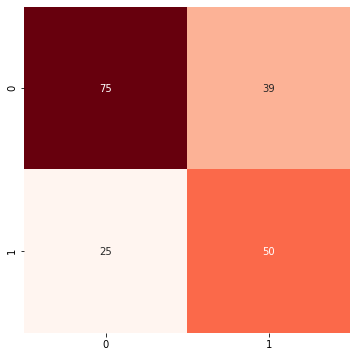

In [45]:
sns.heatmap(conf_mat, square=True, annot=True, cmap='Reds', fmt='d', cbar=False )

# reading the results:
## the algorithm predicted well 75 people called non popular
## and got wrong with predicting 25 non popular (it predicted them as populars)
## the algorithm predicted well 50 people called popular 
## and got wrong with predicting 39 popular (it predicted them as non populars)


# Draft

below we split the data to test and train
X represent the matrix of the train 
Y represent the vector of the test

In [35]:
TRAINING_FEATURES = df.columns[df.columns != 'popular']
TARGET_FEATURE    = 'popular'

x = df[TRAINING_FEATURES]
y = df[TARGET_FEATURE]

In [36]:
x.head()

,price,rating,approved_matirials,last_booked,response_time,is_expensive,countSpeakLanguage,lessons+reviews,lessons+student_count
0,60,5.0,0,4,1.0,0,1,12,3
1,110,5.0,1,1,1.0,1,1,34,11
2,126,5.0,0,5,7.0,1,1,23,6
3,28,0.0,0,2,24.0,0,2,1,2
4,28,0.0,0,15,4.0,0,1,1,2


In [37]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: popular, dtype: int64

general information:
1- represnt popular teacher
0- represent non popular teacher
amount of popular popular and non populars on our data
amount of popular popular and non populars on the train matrix
amount of popular popular and non populars on test vector

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(x.shape[0]))
print("Number of training samples: #{}".format(x_train.shape[0]))
print("Number of test samples: #{}".format(x_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #4017
Number of training samples: #3213
Number of test samples: #804

Target distribution in original dataset:
0    3545
1     472
Name: popular, dtype: int64

Target distribution in the training set:
0    2848
1     365
Name: popular, dtype: int64

Target distribution in the test set:
0    697
1    107
Name: popular, dtype: int64


by Logistic Regression we try to predict on the situation when given a particular teacher and his data whether he is popular or not.

In [39]:
clf_model = LogisticRegression().fit(x_train, y_train)

C:\Users\liors\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the Y column (the train vector) that the algorithm will predict

In [40]:
y_pred=clf_model.predict(x_test)

on the next chart you can see when the algorithm succeseed and were it didnt.  

In [41]:
resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

resDF["correct"]=abs((resDF["Actual"]^resDF["Predicted"])-1)
resDF[resDF["correct"]==1]
resDF

,Actual,Predicted,correct
1071,1,0,0
1200,0,0,1
2718,0,0,1
1289,0,0,1
3687,0,0,1
...,...,...,...
1778,0,0,1
1598,0,0,1
2704,0,0,1
3456,0,0,1


metrics.confusion_matrix(y, y_pred)

In [42]:
df.to_csv('preplyfinal_final_final.csv')
